In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import *

In [2]:
# prepare data
x0_f = "./data/nonlinear_vectorfield_data_x0.txt"
x1_f = "./data/nonlinear_vectorfield_data_x1.txt"
x0 = pd.read_csv(x0_f, header=None, delimiter=" ").values
x1 = pd.read_csv(x1_f, header=None, delimiter=" ").values

del_t = 0.1
vec = (x1 - x0) / del_t

In [3]:
# find epsilon (not used)
def distance(x1, x2):
    return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

max_dis = 0
for i in range(2000):
    for j in range(2000):
        dis = distance(x0[i], x0[j])
        if dis > max_dis:
            max_dis = dis

epsilon = max_dis*0.05
epsilon

0.6207036470222818

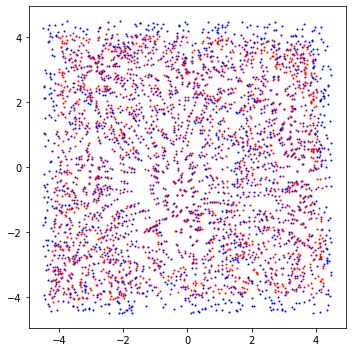

In [4]:
# plot datasets x0(blue) and x1(red), slightly different with exercise fig.1
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(x0[:, 0], x0[:, 1], s=1,c='b')
ax.scatter(x1[:, 0], x1[:, 1], s=1,c='r')
fig.tight_layout()

## Part One & Two

In [5]:
Linear = LinearApprox()
v_hat = Linear.linear_approx(x0, vec)
x1_hat = v_hat * del_t + x0
mse = np.square(x1 - x1_hat).mean()
print("Mean Squared Error: ", mse)


Nonlinear = NonlinearApprox(800, 4)
v_hat = Nonlinear.radial_approx(x0, vec)
x1_hat = v_hat * del_t + x0
mse = np.square(x1 - x1_hat).mean()
print("Mean Squared Error: ", mse)

/home/ubuntujan/workspace/ML_Lab/Crowd_Model_WS5/Crowd_Model_WS5/utils.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.coe = np.linalg.lstsq(x, y)[0]
/home/ubuntujan/workspace/ML_Lab/Crowd_Model_WS5/Crowd_Model_WS5/utils.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.bias = np.linalg.lstsq(x, y)[1]
/home/ubuntujan/workspace/ML_Lab/Crowd_Model_WS5/Crowd_Model_WS5/utils.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the in

Mean Squared Error:  0.018635040587481


/home/ubuntujan/workspace/ML_Lab/Crowd_Model_WS5/Crowd_Model_WS5/utils.py:46: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.bias = np.linalg.lstsq(self.radial, y)[1]


Mean Squared Error:  1.821464589596062e-15


## Part Three

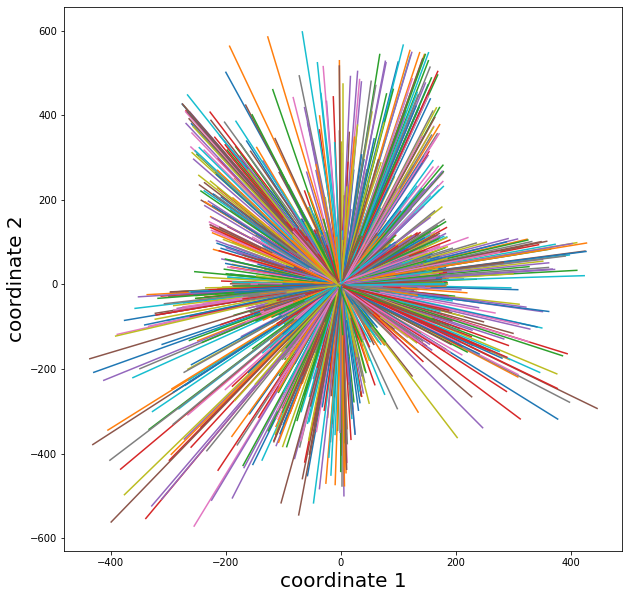

In [41]:
# Plot nonlinear approximated trajectories
T = 100
del_t = 0.1
x_hat_pred = [x0]

for _ in np.arange(T, step=del_t):
    v_hat = Nonlinear.predict(x_hat_pred[-1])
    x_hat = v_hat * del_t + x_hat_pred[-1]
    x_hat_pred.append(x_hat)

x_hat_pred = np.dstack(x_hat_pred)

plt.figure(figsize=(10, 10))
for i in range(x_hat_pred.shape[0]):
    #if (i % 10 == 0):
    plt.plot(x_hat_pred[i, 0, :], x_hat_pred[i, 1, :])
    
plt.xlabel('coordinate 1', fontsize=20)
plt.ylabel('coordinate 2', fontsize=20)
plt.show()

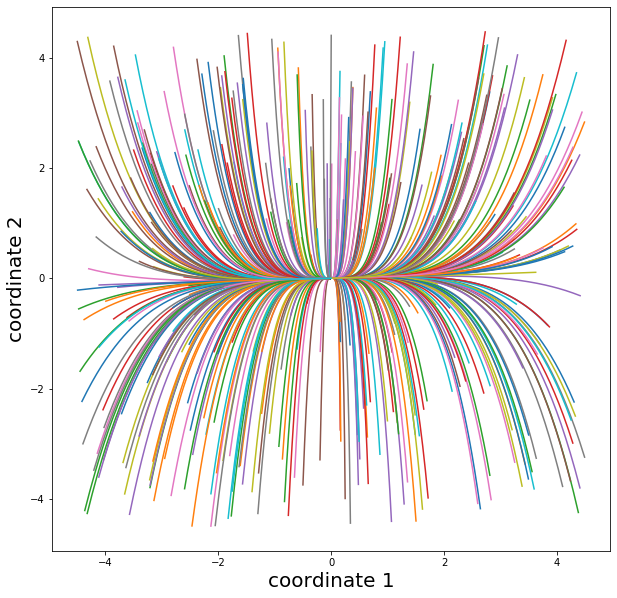

In [47]:
# Plot linear approximated trajectories
T = 100
x_hat_pred = [x0]

for _ in np.arange(T, step=del_t):
    v_hat = Linear.predict(x_hat_pred[-1])
    x_hat = v_hat * del_t + x_hat_pred[-1]
    x_hat_pred.append(x_hat)

x_hat_pred = np.dstack(x_hat_pred)

plt.figure(figsize=(10, 10))
for i in range(x_hat_pred.shape[0]):
    if (i % 5 == 0):
        plt.plot(x_hat_pred[i, 0, :], x_hat_pred[i, 1, :])

plt.xlabel('coordinate 1', fontsize=20)
plt.ylabel('coordinate 2', fontsize=20)
plt.show()